# Time Series EDA

1. Eda with TimeSeries
2. Pandas data reader--Financial data
3. Date time index
4. Time resampling
5. Time Shifts
6. Mean Rolling and Expanding
7. Time series Visualization
8. One sample project on time series

In [85]:
## Install Pandas Data Reader
!pip install pandas-datareader

In [86]:
# importing the libraries

import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

In [87]:
df_tesla=pdr.get_data_yahoo('TSLA')

In [88]:
type(df_tesla)

pandas.core.frame.DataFrame

In [89]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-19,25.492666,24.904667,25.333332,25.006666,96778500.0,25.006666
2017-09-20,25.216667,24.738001,24.866667,24.927334,73786500.0,24.927334
2017-09-21,25.122000,24.300667,24.993334,24.431999,69273000.0,24.431999
2017-09-22,24.660000,23.392000,24.432667,23.406000,122391000.0,23.406000
2017-09-25,23.831333,22.858667,23.543333,22.999332,114088500.0,22.999332


<AxesSubplot:xlabel='Date'>

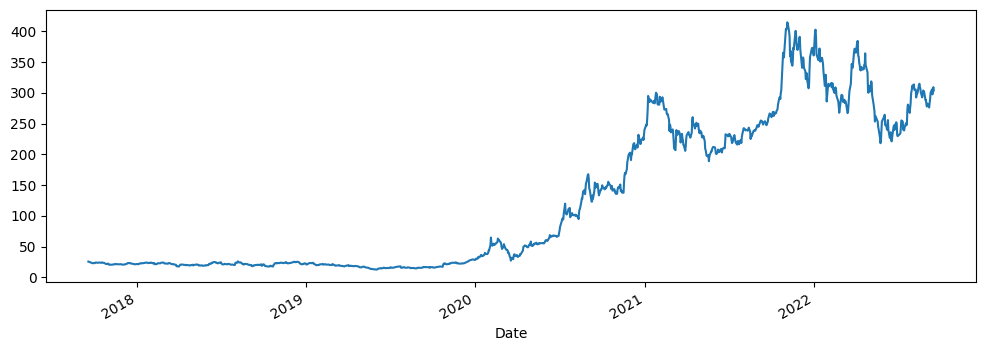

In [90]:

df_tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

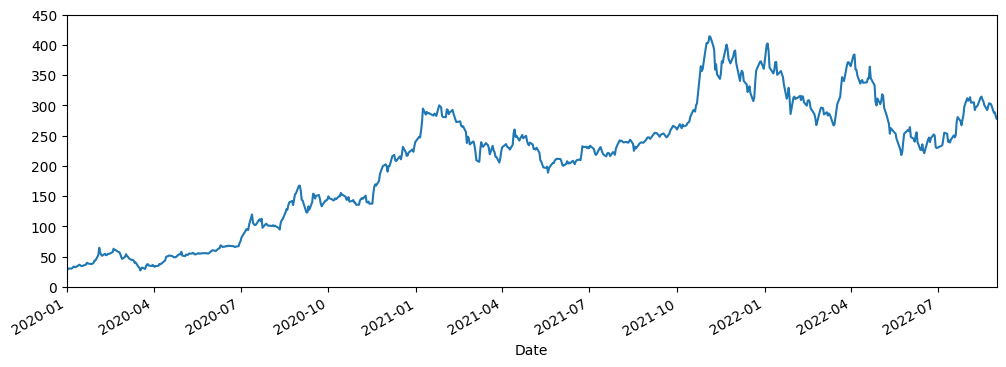

In [91]:
# X-limit and y-limit

df_tesla['High'].plot(figsize=(12,4),xlim=['2020-01-01','2022-09-01'],ylim=[0,450])

In [92]:
df_tesla.index

DatetimeIndex(['2017-09-19', '2017-09-20', '2017-09-21', '2017-09-22',
               '2017-09-25', '2017-09-26', '2017-09-27', '2017-09-28',
               '2017-09-29', '2017-10-02',
               ...
               '2022-09-02', '2022-09-06', '2022-09-07', '2022-09-08',
               '2022-09-09', '2022-09-12', '2022-09-13', '2022-09-14',
               '2022-09-15', '2022-09-16'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [93]:
index=df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open=df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

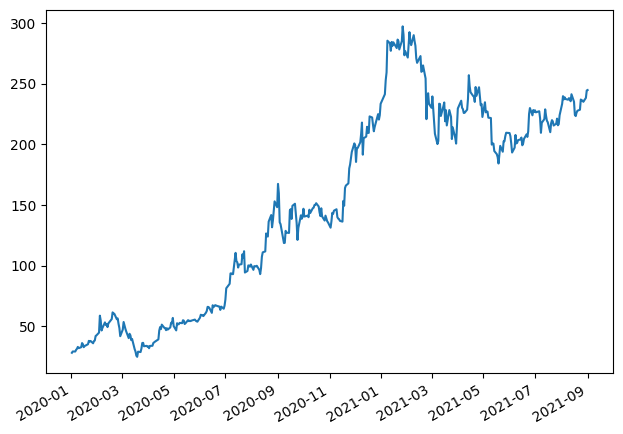

In [95]:
figure,axis=plt.subplots()
plt.tight_layout()
#preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [96]:
## Datetime Index

In [97]:
df_tesla=df_tesla.reset_index()

In [98]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [99]:
df_tesla=df_tesla.set_index('Date',drop=True)
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-19,25.492666,24.904667,25.333332,25.006666,96778500.0,25.006666
2017-09-20,25.216667,24.738001,24.866667,24.927334,73786500.0,24.927334
2017-09-21,25.122000,24.300667,24.993334,24.431999,69273000.0,24.431999
2017-09-22,24.660000,23.392000,24.432667,23.406000,122391000.0,23.406000
2017-09-25,23.831333,22.858667,23.543333,22.999332,114088500.0,22.999332


In [100]:
## Datetime

In [101]:
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [102]:
datetime.now()

datetime.datetime(2022, 9, 19, 15, 11, 56, 608702)

In [103]:
date=datetime(2021,11,21)
date

datetime.datetime(2021, 11, 21, 0, 0)

In [104]:
date.date()

datetime.date(2021, 11, 21)

In [105]:
date.day

21

In [106]:
date.weekday()

6

In [107]:
date.year

2021

In [108]:
date.month

11

## Time Resampling

In [109]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-19,25.492666,24.904667,25.333332,25.006666,96778500.0,25.006666
2017-09-20,25.216667,24.738001,24.866667,24.927334,73786500.0,24.927334
2017-09-21,25.122000,24.300667,24.993334,24.431999,69273000.0,24.431999
2017-09-22,24.660000,23.392000,24.432667,23.406000,122391000.0,23.406000
2017-09-25,23.831333,22.858667,23.543333,22.999332,114088500.0,22.999332


In [110]:
## Year and frequency

df_tesla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,20.297333,19.508667,19.966667,19.950666,48661500.0,19.950666
2018-12-31,17.355333,16.306000,16.851999,16.704000,46210500.0,16.704000
2019-12-31,12.445333,11.799333,12.073333,11.931333,36984000.0,11.931333
2020-12-31,26.990667,23.367332,24.980000,24.081333,52073100.0,24.081333
2021-12-31,188.736664,179.830002,184.183334,187.666672,29401800.0,187.666672
2022-12-31,217.973328,206.856674,207.949997,209.386673,41864700.0,209.386673


<AxesSubplot:xlabel='Date'>

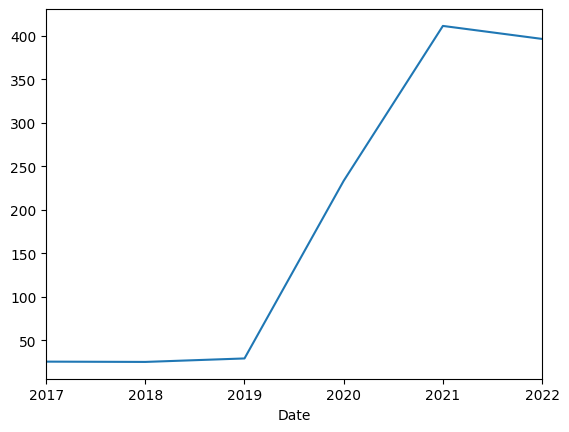

In [111]:
df_tesla.resample(rule='A').max()['Open'].plot()

In [112]:
## Quarterly

df_tesla.resample(rule='QS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-01,25.492666,24.904667,25.333332,25.006666,122391000.0,25.006666
2017-10-01,24.200001,23.608667,23.798668,23.976667,296871000.0,23.976667
2018-01-01,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-04-01,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-07-01,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667
2018-10-01,25.299334,24.450001,25.000000,25.119333,411382500.0,25.119333
2019-01-01,23.466667,22.943333,23.080667,23.153999,362262000.0,23.153999
2019-04-01,19.744667,19.144667,19.219999,19.454000,398206500.0,19.454000
2019-07-01,17.738001,17.210667,17.278000,17.658667,336274500.0,17.658667


<AxesSubplot:xlabel='Date'>

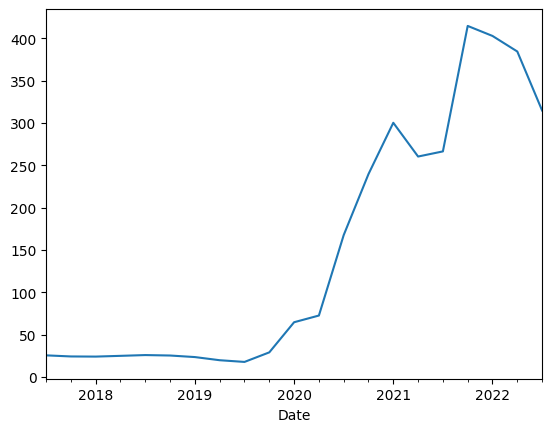

In [113]:
df_tesla.resample(rule='QS').max()['High'].plot()

In [114]:
## Bussiness End Frequency

df_tesla.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,25.492666,24.904667,25.333332,25.006666,296871000.0,25.006666
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-30,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


In [115]:
## Bussiness Quaters

df_tesla.resample(rule='BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-07-03,25.492666,24.904667,25.333332,25.006666,122391000.0,25.006666
2017-10-02,24.200001,23.608667,23.798668,23.976667,296871000.0,23.976667
2018-01-01,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-04-02,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-07-02,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667
2018-10-01,25.299334,24.450001,25.000000,25.119333,411382500.0,25.119333
2019-01-01,23.466667,22.943333,23.080667,23.153999,362262000.0,23.153999
2019-04-01,19.744667,19.144667,19.219999,19.454000,398206500.0,19.454000
2019-07-01,17.738001,17.210667,17.278000,17.658667,336274500.0,17.658667


<AxesSubplot:xlabel='Date'>

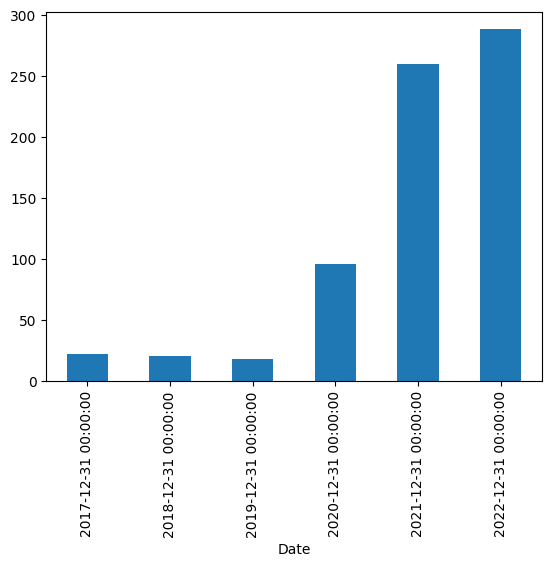

In [116]:
## plotting
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

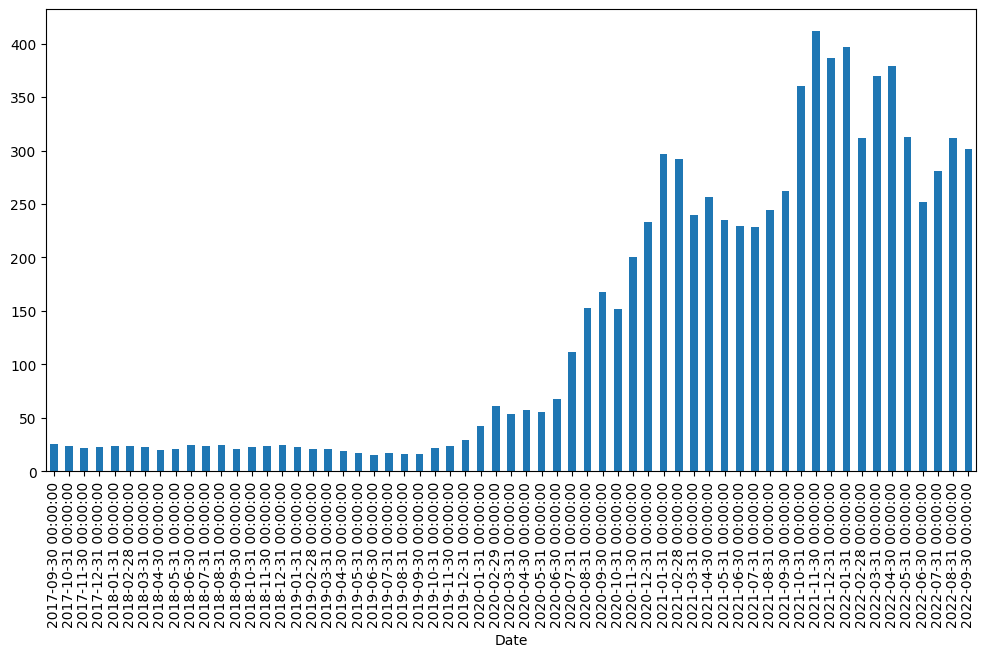

In [117]:
# Monthly

df_tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(12,6))

In [118]:
df_tesla.rolling(3).mean().head(20)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-19,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-20,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-21,25.277111,24.647778,25.064444,24.788666,79946000.0,24.788666
2017-09-22,24.999556,24.143556,24.764222,24.255111,88483500.0,24.255111
2017-09-25,24.537778,23.517111,24.323111,23.612444,101917500.0,23.612444
2017-09-26,23.969111,22.992445,23.790444,23.140666,114608000.0,23.140666
2017-09-27,23.560000,22.761779,23.421778,22.915777,104112500.0,22.915777
2017-09-28,23.232889,22.595556,23.126889,22.796000,92681000.0,22.796000
2017-09-29,23.087111,22.544445,22.925334,22.703777,82435000.0,22.703777


In [119]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-09-19,25.492666,24.904667,25.333332,25.006666,96778500.0,25.006666
2017-09-20,25.216667,24.738001,24.866667,24.927334,73786500.0,24.927334
2017-09-21,25.122000,24.300667,24.993334,24.431999,69273000.0,24.431999
2017-09-22,24.660000,23.392000,24.432667,23.406000,122391000.0,23.406000
2017-09-25,23.831333,22.858667,23.543333,22.999332,114088500.0,22.999332
...,...,...,...,...,...,...
2022-09-12,305.489990,300.399994,300.720001,304.420013,48674600.0,304.420013
2022-09-13,297.399994,290.399994,292.899994,292.130005,68229600.0,292.130005
2022-09-14,306.000000,291.640015,292.239990,302.609985,72628700.0,302.609985


In [120]:
df_tesla['Open: 30 days rolling']=df_tesla['Open'].rolling(30).mean()

In [121]:
df_tesla.head(20)

,High,Low,Open,Close,Volume,Adj Close,Open: 30 days rolling
Date,,,,,,,
2017-09-19,25.492666,24.904667,25.333332,25.006666,96778500.0,25.006666,NaN
2017-09-20,25.216667,24.738001,24.866667,24.927334,73786500.0,24.927334,NaN
2017-09-21,25.122000,24.300667,24.993334,24.431999,69273000.0,24.431999,NaN
2017-09-22,24.660000,23.392000,24.432667,23.406000,122391000.0,23.406000,NaN
2017-09-25,23.831333,22.858667,23.543333,22.999332,114088500.0,22.999332,NaN
2017-09-26,23.416000,22.726667,23.395332,23.016666,107344500.0,23.016666,NaN
2017-09-27,23.432667,22.700001,23.326668,22.731333,90904500.0,22.731333,NaN
2017-09-28,22.850000,22.360001,22.658667,22.639999,79794000.0,22.639999,NaN
2017-09-29,22.978666,22.573334,22.790667,22.740000,76606500.0,22.740000,NaN


<AxesSubplot:xlabel='Date'>

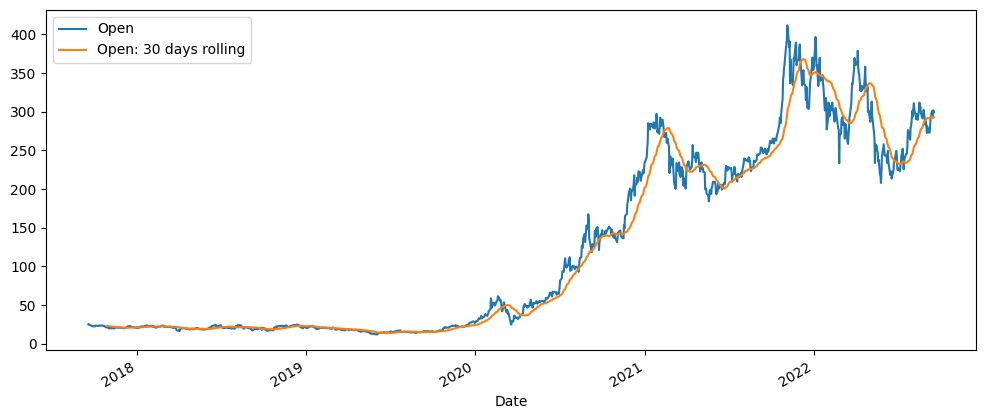

In [122]:
df_tesla[['Open','Open: 30 days rolling']].plot(figsize=(12,5))

## Assignment
## News
1. Read the Microsoft Data using pandas data reader
2. Get the maximum price of the share from 2017 to 2022
3. Which is the date of the highest price of the stock?
4. Which is the date of the lowest price of the stock?

In [123]:
## Simple moving average

<AxesSubplot:xlabel='Date'>

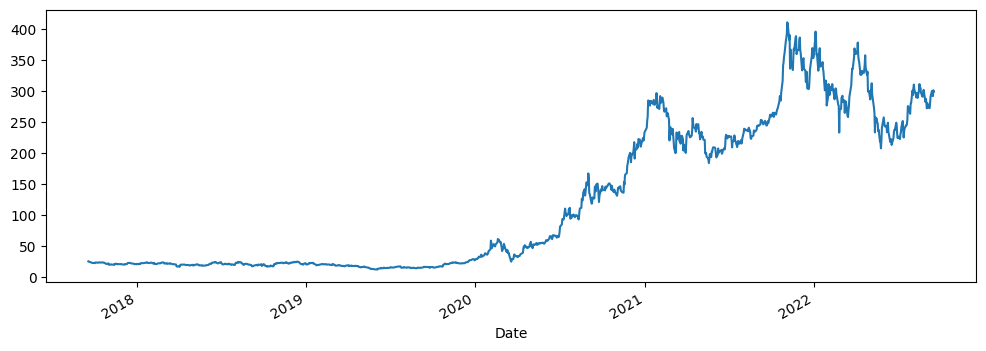

In [125]:
df_tesla['Open'].plot(figsize=(12,4))

In [129]:
df_tesla['Open:10 days rolling']=df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

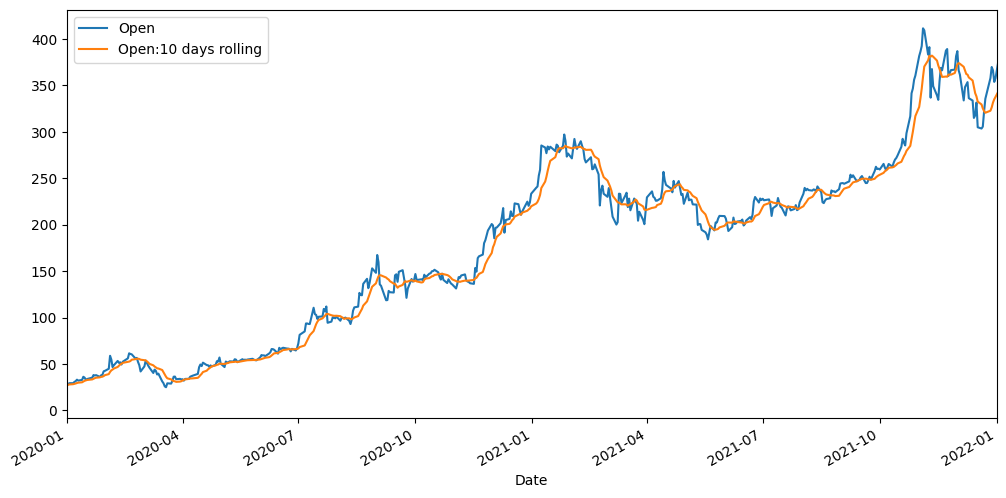

In [134]:
df_tesla[['Open','Open:10 days rolling']].plot(figsize=(12,6),xlim=['2020-01-01','2022-01-01'])

In [135]:
df_tesla['Open:20 days rolling']=df_tesla['Open'].rolling(window=20,min_periods=1).mean()
df_tesla['Open:40 days rolling']=df_tesla['Open'].rolling(window=40,min_periods=1).mean()
df_tesla['Open:50 days rolling']=df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

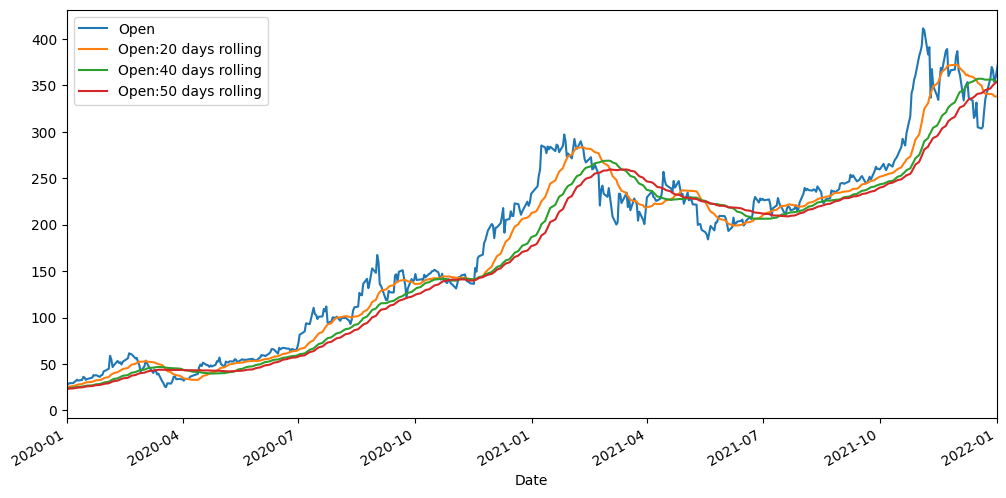

In [137]:
df_tesla[['Open','Open:20 days rolling','Open:40 days rolling','Open:50 days rolling']].plot(figsize=(12,6),xlim=['2020-01-01','2022-01-01'])


## Cummulative Moving Average

<AxesSubplot:xlabel='Date'>

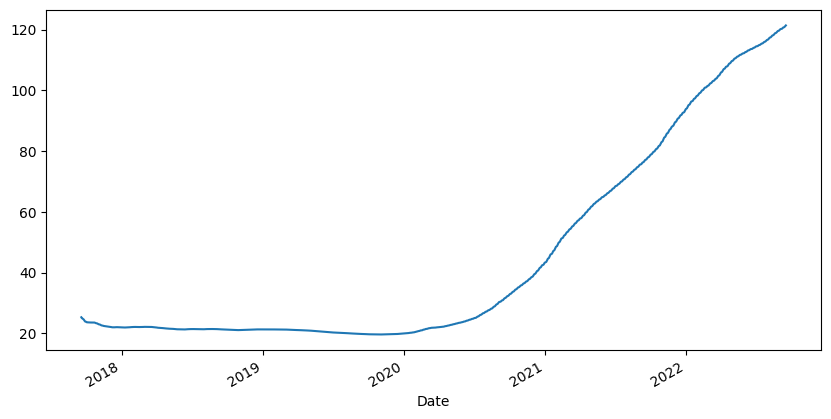

In [140]:
### Expanding

df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

In [141]:
## EMA


In [143]:
# Lets smoothing factor - 0.1

df_tesla['EMA_0.1']=df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()
df_tesla

,High,Low,Open,Close,Volume,Adj Close,Open: 30 days rolling,Open:10 days rolling,Open:20 days rolling,Open:40 days rolling,Open:50 days rolling,E<A_0.1,EMA_0.1
Date,,,,,,,,,,,,,
2017-09-19,25.492666,24.904667,25.333332,25.006666,96778500.0,25.006666,NaN,25.333332,25.333332,25.333332,25.333332,25.333332,25.333332
2017-09-20,25.216667,24.738001,24.866667,24.927334,73786500.0,24.927334,NaN,25.099999,25.099999,25.099999,25.099999,25.286666,25.286666
2017-09-21,25.122000,24.300667,24.993334,24.431999,69273000.0,24.431999,NaN,25.064444,25.064444,25.064444,25.064444,25.257332,25.257332
2017-09-22,24.660000,23.392000,24.432667,23.406000,122391000.0,23.406000,NaN,24.906500,24.906500,24.906500,24.906500,25.174866,25.174866
2017-09-25,23.831333,22.858667,23.543333,22.999332,114088500.0,22.999332,NaN,24.633867,24.633867,24.633867,24.633867,25.011713,25.011713
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-12,305.489990,300.399994,300.720001,304.420013,48674600.0,304.420013,293.641666,282.443997,291.350497,286.015084,275.739667,287.120830,287.120830
2022-09-13,297.399994,290.399994,292.899994,292.130005,68229600.0,292.130005,293.362443,283.450998,290.906163,287.214167,277.057667,287.698747,287.698747
2022-09-14,306.000000,291.640015,292.239990,302.609985,72628700.0,302.609985,293.303665,283.887997,289.934830,288.395167,278.442466,288.152871,288.152871


<AxesSubplot:xlabel='Date'>

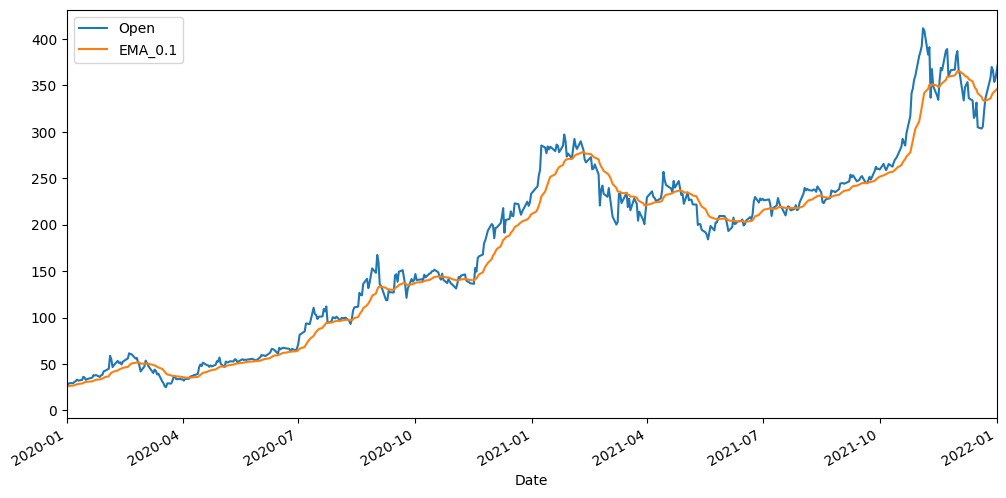

In [144]:
df_tesla[['Open','EMA_0.1']].plot(figsize=(12,6),xlim=['2020-01-01','2022-01-01'])


<AxesSubplot:xlabel='Date'>

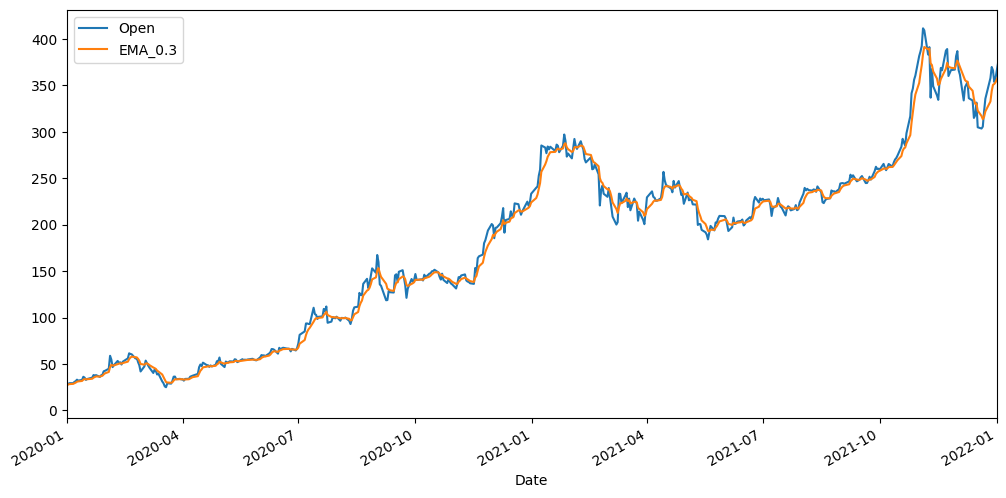

In [145]:
# Lets smoothing factor - 0.3

df_tesla['EMA_0.3']=df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean()
df_tesla[['Open','EMA_0.3']].plot(figsize=(12,6),xlim=['2020-01-01','2022-01-01'])

<AxesSubplot:xlabel='Date'>

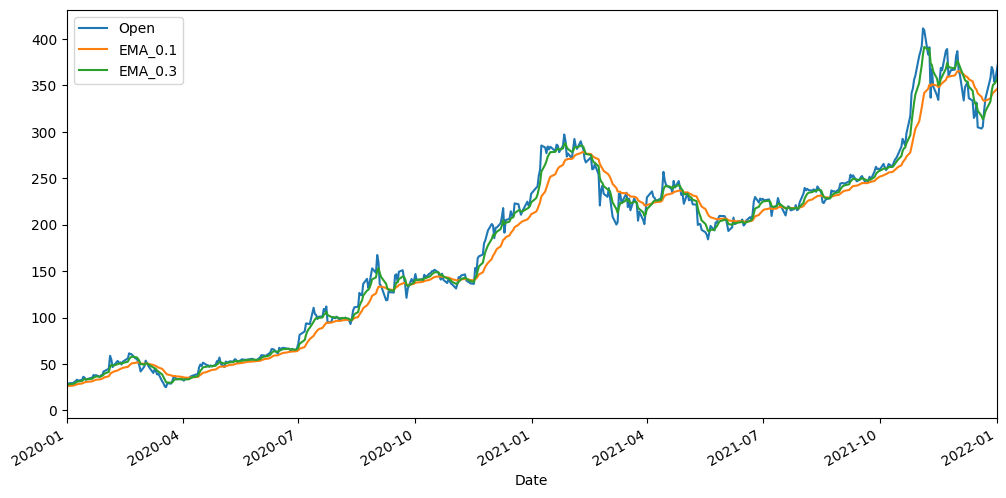

In [147]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(figsize=(12,6),xlim=['2020-01-01','2022-01-01'])



In [148]:
## EWMA

In [149]:
df_tesla['EWMA_5days']=df_tesla['Open'].ewm(span=5,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

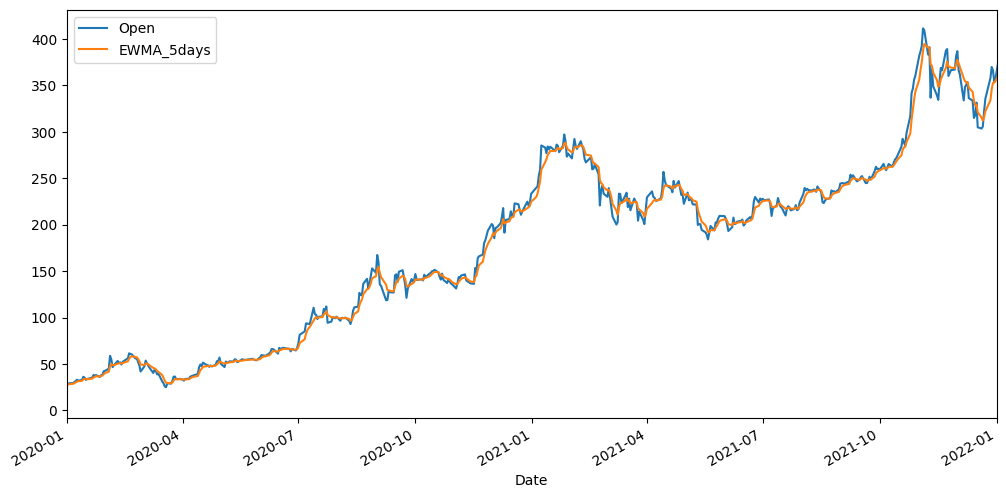

In [150]:
df_tesla[['Open','EWMA_5days']].plot(figsize=(12,6),xlim=['2020-01-01','2022-01-01'])